# Capstone Data Wrangling and EDA

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import spacy
import scattertext

In [3]:
from nltk import corpus

In [4]:
import numpy as np
from glob import glob

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import f1_score

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [8]:
from sklearn.linear_model import SGDClassifier

# 1. Load Data

In [9]:
# Load the data
data = pd.read_excel('data/Yelp_Restaurant_Reviews_DF_1M_7Y.xlsx')

In [10]:
data.head()

,name,city,state,stars,review_count,categories,review_stars,is_funny,funny_count,cool,text,date
0,Community Q BBQ,Decatur,GA,4.0,886,"Barbeque, American (Traditional), Restaurants,...",3,1,264,348,[ DISCLAIMER ] \nI'm not a complainer. Never h...,2020-01-23 17:35:16
1,Land of a Thousand Hills Coffee Co.,Lynn,MA,4.5,52,"Event Planning & Services, Coffee & Tea, Glute...",5,1,230,0,Service good and friendly. Coffee choices grea...,2016-06-18 23:28:31
2,Community Q BBQ,Decatur,GA,4.0,886,"Barbeque, American (Traditional), Restaurants,...",5,1,184,239,I want to apologize to the owners of Community...,2018-04-04 23:39:19
3,Ponce City Market,Atlanta,GA,4.0,1139,"Food Court, Shopping Centers, Home Services, R...",5,1,172,220,I am totally in love with this place! This is ...,2017-09-15 14:47:18
4,Meatballerz Restaurant,Atlanta,GA,4.5,77,"Food Trucks, Food, Italian, Breakfast & Brunch...",3,1,171,186,"Their company motto is: ""You won't regret putt...",2019-03-25 12:33:20


# 2. Data Wrangling

## 2.1 Clean the data
Let's drop some columns that don't add anything to our purpose:

In [11]:
df = data.copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573657 entries, 0 to 573656
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   name          573657 non-null  object        
 1   city          573657 non-null  object        
 2   state         573657 non-null  object        
 3   stars         573657 non-null  float64       
 4   review_count  573657 non-null  int64         
 5   categories    573657 non-null  object        
 6   review_stars  573657 non-null  int64         
 7   is_funny      573657 non-null  int64         
 8   funny_count   573657 non-null  int64         
 9   cool          573657 non-null  int64         
 10  text          573638 non-null  object        
 11  date          573657 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 52.5+ MB


Assign to a new dataframe df, after dropping the date field

In [13]:
# Drop the following columns: business_id, address, latitude, longitude, is_open, attributes, categories, hours, user_id, date
df.drop(df.columns[[0,1,2,5,9,11]], axis=1, inplace=True)

In [14]:
df = df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573638 entries, 0 to 573656
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   stars         573638 non-null  float64
 1   review_count  573638 non-null  int64  
 2   review_stars  573638 non-null  int64  
 3   is_funny      573638 non-null  int64  
 4   funny_count   573638 non-null  int64  
 5   text          573638 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 30.6+ MB


In [16]:
df.head()

,stars,review_count,review_stars,is_funny,funny_count,text
0,4.0,886,3,1,264,[ DISCLAIMER ] \nI'm not a complainer. Never h...
1,4.5,52,5,1,230,Service good and friendly. Coffee choices grea...
2,4.0,886,5,1,184,I want to apologize to the owners of Community...
3,4.0,1139,5,1,172,I am totally in love with this place! This is ...
4,4.5,77,3,1,171,"Their company motto is: ""You won't regret putt..."


The dataframe looks a lot cleaner now too. Let's move on.

## 2.2 Visualize distribution of initial data

### Distribution of Business Ratings

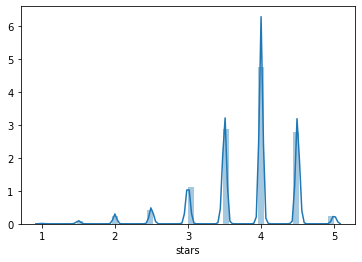

In [19]:
sns.distplot(df['stars']);

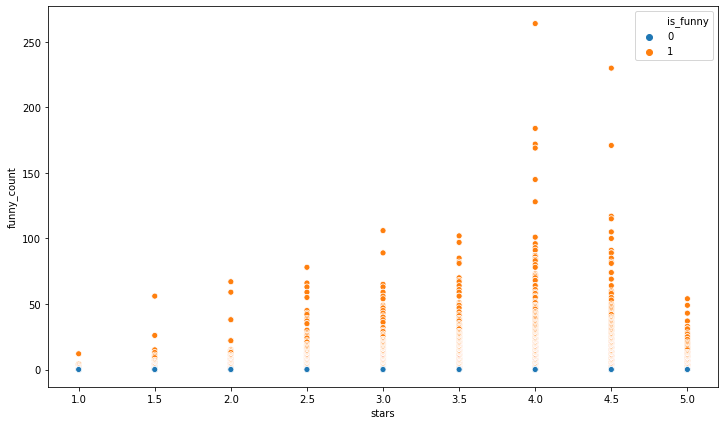

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='stars', y='funny_count', hue='is_funny', data=df)

### Distribution of Review Ratings

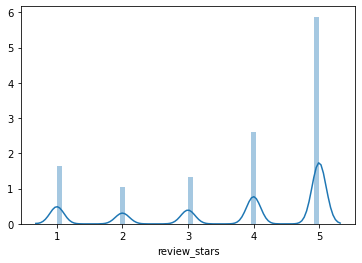

In [17]:
sns.distplot(df['review_stars']);

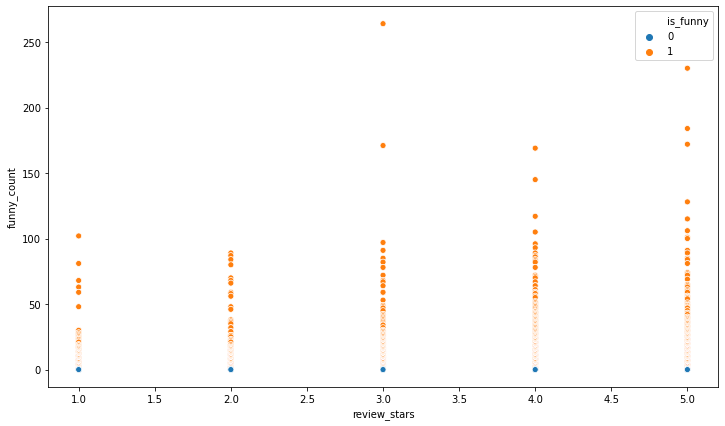

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='review_stars', y='funny_count', hue='is_funny', data=df)

## 2.3 Data Wrangling

### Assign "rating" groups to Low and High

In [24]:
df['rating'] = df['stars'].replace(
                {1: 'Low Rating', 1.5: 'Low Rating', 2: 'Low Rating', 2.5: 'Low Rating', 3: 'Low Rating', 3.5: 'Low Rating',
                 4: 'High Rating', 4.5: 'High Rating', 5: 'High Rating'})

In [25]:
df['fun_meter'] = df['is_funny'].replace(
                    {0: 'Not Funny', 1: 'Funny'})

In [26]:
df.head()

,stars,review_count,review_stars,is_funny,funny_count,text,rating,fun_meter
0,4.0,886,3,1,264,[ DISCLAIMER ] \nI'm not a complainer. Never h...,High Rating,Funny
1,4.5,52,5,1,230,Service good and friendly. Coffee choices grea...,High Rating,Funny
2,4.0,886,5,1,184,I want to apologize to the owners of Community...,High Rating,Funny
3,4.0,1139,5,1,172,I am totally in love with this place! This is ...,High Rating,Funny
4,4.5,77,3,1,171,"Their company motto is: ""You won't regret putt...",High Rating,Funny


### For fun, let's look at restaurants that have 'Low Ratings'

In [27]:
df_low_rests = df[df['rating']=='Low Rating']

In [28]:
df.shape, df_low_rests.shape

((573638, 8), (216750, 8))

In [29]:
low_rating_rests = round(100*len(df_low_rests)/len(df),2)

In [30]:
print(low_rating_rests, "% of restaurants have low ratings")

37.79 % of restaurants have low ratings


#### Business Ratings and Count of Reviews

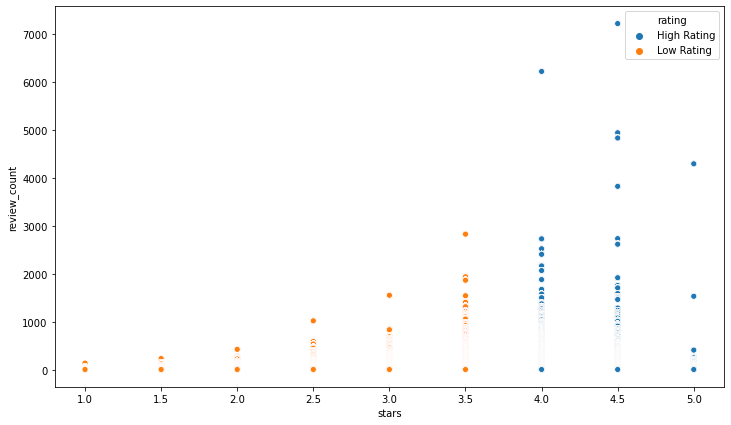

In [37]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='stars', y='review_count', hue='rating', data=df)

# 3. Exploratory Data Analysis

## 3.1. Correlations

### Vizualize correlation between Business Rating Scores and 'Funny' Reviews

#### Let's take a look at restaurant 'stars' and 'funny' correlation:

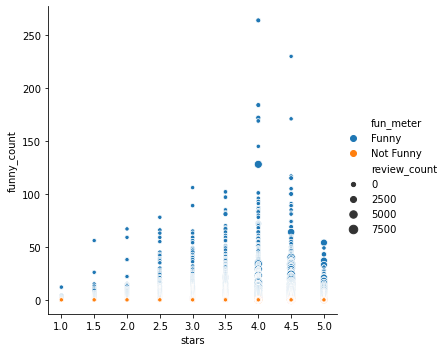

In [31]:
sns.relplot(x='stars',
            y='funny_count',
            data=df,
            kind='scatter',
            size='review_count',
            hue='fun_meter')

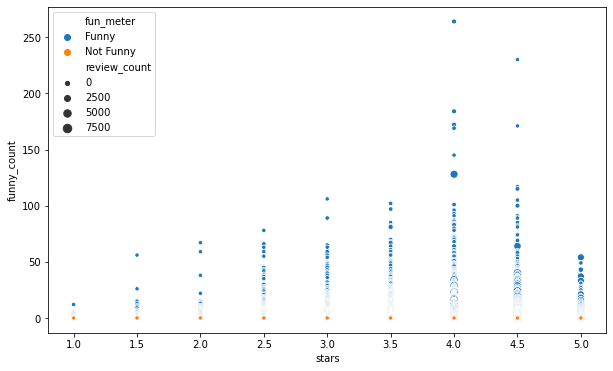

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='stars', y='funny_count', hue='fun_meter', size='review_count', data=df)

It looks like the higher the star rating of a restaurant, the higher chance there is a funny review.

#### Another chart to confirm the correlation:

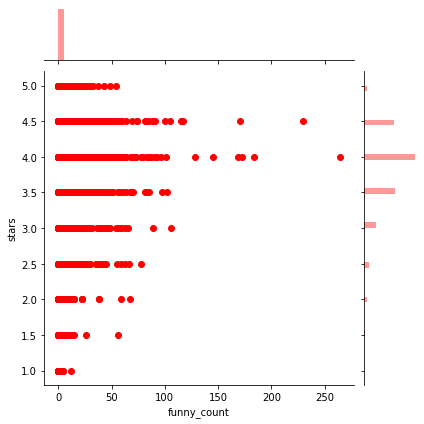

In [26]:
sns.jointplot(x=df['funny_count'], y=df['stars'], color='Red');

#### Let's take a look at review 'ratings' and 'funny' correlation:

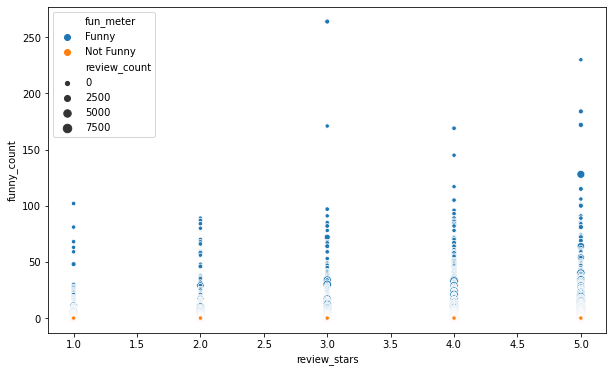

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='review_stars', y='funny_count', hue='fun_meter', size='review_count', data=df)

## 3.2. Is dataset balanced?

In [45]:
funny_count = len(df.loc[df.fun_meter=='Funny'])
not_funny_count = len(df.loc[df.fun_meter=='Not Funny'])

In [46]:
print('The ratio of Funny to Not Funny in the dataset is Funny:', funny_count, ' to Not Funny: ', not_funny_count)
print('or ', round(100*funny_count/not_funny_count, 2), "% to 100%")

The ratio of Funny to Not Funny in the dataset is Funny: 79672  to Not Funny:  493966
or  16.13 % to 100%


This will means the intial dataset is going to lead to skewed results and needs rebalancing

### Let's balance the source dataset

#### First, split into 'Funny' and 'Not Funny' dataframes

In [47]:
df_funny = df.loc[df.fun_meter=='Funny']
df_funny = df_funny.reset_index(drop=True)
df_funny.head(2)

,stars,review_count,review_stars,is_funny,funny_count,text,rating,fun_meter
0,4.0,886,3,1,264,[ DISCLAIMER ] \nI'm not a complainer. Never h...,High Rating,Funny
1,4.5,52,5,1,230,Service good and friendly. Coffee choices grea...,High Rating,Funny


In [48]:
df_not_funny = df.loc[df.fun_meter=='Not Funny']
df_not_funny = df_not_funny.reset_index(drop=True)
df_not_funny.head(2)

,stars,review_count,review_stars,is_funny,funny_count,text,rating,fun_meter
0,4.5,7219,1,0,0,"This place had become predatory since COVID, b...",High Rating,Not Funny
1,4.5,7219,1,0,0,"Way over priced, the ""cat head chicken sandwic...",High Rating,Not Funny


#### Second, balance the dataframe sizes

In [49]:
# Now, set the number of 'Not Funny' observations to those of 'Funny' ones
print('Number of rows in Not Funny before trimming to match the number of rows in Funny:', len(df_not_funny))
df_not_funny = df_not_funny.loc[:len(df_funny)]
print('Number of rows in Not Funny after trimming to match the number of rows in Funny:', len(df_not_funny))

Number of rows in Not Funny before trimming to match the number of rows in Funny: 493966
Number of rows in Not Funny after trimming to match the number of rows in Funny: 79673


#### Finally, concatenate the 'Funny' and 'Not Funny' dataframes back into one - name it 'df_set'

In [50]:
df_set = pd.concat([df_funny, df_not_funny], axis=0)
df_set = df_set.reset_index(drop=True)
df_set.head(2)

,stars,review_count,review_stars,is_funny,funny_count,text,rating,fun_meter
0,4.0,886,3,1,264,[ DISCLAIMER ] \nI'm not a complainer. Never h...,High Rating,Funny
1,4.5,52,5,1,230,Service good and friendly. Coffee choices grea...,High Rating,Funny


In [51]:
len(df_set)

159345

Looks good, the total number of rows is now the double of 'Not Funny' subset, so we're good.

## 3.3. Data optimization

### Drop random rows from df_set dataframe to optimize for the laptop's limited memory - reduce to 10%

In [52]:
df_reviews = df_set.sample(frac=0.1, replace=True, random_state=1)

In [53]:
df_reviews.shape

(15934, 8)

In [54]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15934 entries, 128037 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stars         15934 non-null  float64
 1   review_count  15934 non-null  int64  
 2   review_stars  15934 non-null  int64  
 3   is_funny      15934 non-null  int64  
 4   funny_count   15934 non-null  int64  
 5   text          15934 non-null  object 
 6   rating        15934 non-null  object 
 7   fun_meter     15934 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


## 3.4 NLP Analysis with Scattertext and spaCy

In [55]:
nlp = spacy.load('en_core_web_sm')

### Term Frequency Function

In [56]:
def term_freq(df_yelp):
    corpus = (scattertext.CorpusFromPandas(df_yelp,
                                           category_col='fun_meter', 
                                           text_col='text',
                                           nlp=nlp)
              .build()
              .remove_terms(nlp.Defaults.stop_words, ignore_absences=True)
              )
    df = corpus.get_term_freq_df()
    df['Funny_Score'] = corpus.get_scaled_f_scores('Funny')
    df['Not_Funny_Score'] = corpus.get_scaled_f_scores('Not Funny')
    df['Funny_Score'] = round(df['Funny_Score'], 2)
    df['Not_Funny_Score'] = round(df['Not_Funny_Score'], 2)
    
    df_high = df.sort_values(by='Funny freq', 
                             ascending = False).reset_index()
    df_low = df.sort_values(by='Not Funny freq', 
                            ascending=False).reset_index()
    return df_high, df_low

In [58]:
funny_reviews, meh_reviews = term_freq(df_reviews)

In [59]:
funny_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405272 entries, 0 to 405271
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   term             405272 non-null  object 
 1   Not Funny freq   405272 non-null  int32  
 2   Funny freq       405272 non-null  int32  
 3   Funny_Score      405272 non-null  float64
 4   Not_Funny_Score  405272 non-null  float64
dtypes: float64(2), int32(2), object(1)
memory usage: 12.4+ MB


In [60]:
funny_reviews.sort_values(by='Funny_Score', ascending = False).head(20)

,term,Not Funny freq,Funny freq,Funny_Score,Not_Funny_Score
483,chinese,29,360,1.00,0.00
2483,chinese food,6,85,0.99,0.01
1959,airport,17,106,0.98,0.02
2006,looks like,14,103,0.98,0.02
1126,pot,32,178,0.98,0.02
2502,bagel,9,84,0.98,0.02
2983,naan,5,71,0.97,0.03
2435,website,13,86,0.97,0.03
1224,indian,35,165,0.97,0.03
2298,the drive,13,91,0.97,0.03


In [61]:
meh_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405272 entries, 0 to 405271
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   term             405272 non-null  object 
 1   Not Funny freq   405272 non-null  int32  
 2   Funny freq       405272 non-null  int32  
 3   Funny_Score      405272 non-null  float64
 4   Not_Funny_Score  405272 non-null  float64
dtypes: float64(2), int32(2), object(1)
memory usage: 12.4+ MB


In [62]:
meh_reviews.sort_values(by='Not_Funny_Score', ascending=False).head()

,term,Not Funny freq,Funny freq,Funny_Score,Not_Funny_Score
667,books,181,39,0.00,1.00
1419,great atmosphere,91,22,0.00,1.00
935,lobster roll,135,42,0.01,0.99
1578,screen door,83,28,0.01,0.99
1236,oyster,103,37,0.01,0.99


# 4. Pre-processing and Modeling

### Split Data into Train and Validation partitions

In [63]:
# Split by default Test 25/Train 75
X_train, x_test, y_train, y_test = train_test_split(df_reviews.text, df_reviews.fun_meter, train_size=0.75, random_state=42)

In [64]:
len(x_test), len(X_train)

(3984, 11950)

## 4.1. Model 1 - Linear SVM Classifier

The first model we will use is Support Vector Machine, a linear model for classification problem.

### 4.1.1. CountVectorizer

In [65]:
# Create an array of words per each sentence
v = CountVectorizer()
x_train_vector = v.fit_transform(X_train)
x_test_vector = v.transform(x_test)

Now that we have the numerical data, we can feed it into a classification model

### 4.1.2. Classification Model - Linear SVM

In [66]:
# create an instance of SVM
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(x_train_vector, y_train)

SVC(kernel='linear')

### 4.1.3. Evaluate Linear SVM

#### Evaluate performance on the train dataset

In [67]:
clf_svm.score(x_train_vector, y_train)

0.9834309623430962

#### Evaluate performance on test dataset

In [68]:
clf_svm.score(x_test_vector, y_test)

0.7105923694779116

In [69]:
f1_score(y_test, clf_svm.predict(x_test_vector), average=None)

array([0.69745474, 0.72263652])

In [70]:
# Linear SVM - predict and analyze the results
y_pred_SVM = clf_svm.predict(x_test_vector)
yt_pred_SVM = clf_svm.predict(x_train_vector)

In [71]:
# Linear SVM Model results - Confusion Matrix

cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print(f'Confusion Matrix :\n {cm_SVM}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test, y_pred_SVM)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train, yt_pred_SVM)}\n')
print(f'Classification Report :\n {classification_report(y_test, y_pred_SVM)}')

Confusion Matrix :
 [[1329  651]
 [ 502 1502]]

Test Set Accuracy Score :
 0.7105923694779116

Train Set Accuracy Score :
 0.9834309623430962

Classification Report :
               precision    recall  f1-score   support

       Funny       0.73      0.67      0.70      1980
   Not Funny       0.70      0.75      0.72      2004

    accuracy                           0.71      3984
   macro avg       0.71      0.71      0.71      3984
weighted avg       0.71      0.71      0.71      3984



### 4.1.3. Model 1 - Confusion Matrix Vizualization

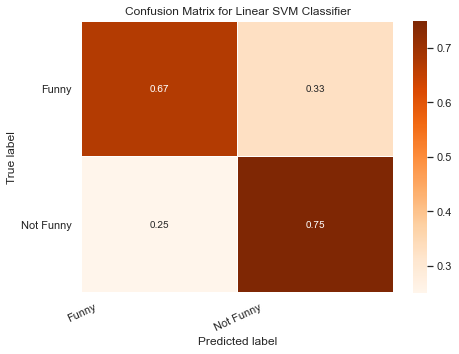

In [72]:
# View confusion matrix for test data and predictions
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_SVM)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Oranges, linewidths=0.2)

# Add labels to the plot
class_names = ['Funny', 'Not Funny']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Linear SVM Classifier')
plt.show()

### 4.1.4. Predict on input review text, using Linear SVM model:

#### Looking for funny output here:

In [73]:
my_review = ["The place is truly a tourist trap dump! \
mochi doughnuts do that security ham like baby sound like like Like what\
jay dim sum offerings words of wisdom"]
               
my_review_vector = v.transform(my_review)
clf_svm.predict(my_review_vector)[0]

'Funny'

#### Looking for not funny output here:

In [74]:
not_funny_review = ["This restaurant is not very good. Giving this 3.5 stars and not coming back."]
my_review_vector = v.transform(not_funny_review)
clf_svm.predict(my_review_vector)[0]

'Not Funny'

### 4.1.5. Make 4 input text examples to test out the model - to be also used on the models further down:

In [122]:
# Example 1:
my_review_1 = ["The place is truly a touristic trap dump! It looks like a restaurant, but it is not!"]
my_review_vector_1 = v.transform(my_review_1)
clf_svm.predict(my_review_vector_1)[0]

'Funny'

In [123]:
# Example 2:
my_review_2 = ["I told the owner that mochi and doughnuts were speaking to me the words of wisdom"]
my_review_vector_2 = v.transform(my_review_2)
clf_svm.predict(my_review_vector_2)[0]

'Not Funny'

In [124]:
# Example 3:
my_review_3 = ["Can't even explain how much I love this place"]
my_review_vector_3 = v.transform(my_review_3)
clf_svm.predict(my_review_vector_3)[0]

'Not Funny'

In [78]:
# Example 4:
my_review_4 = ["This restaurant is not very good. Giving this 3.5 stars and not coming back."]
my_review_vector_4 = v.transform(my_review_4)
clf_svm.predict(my_review_vector_4)[0]

'Not Funny'

## 4.2. Model 2 - Random Forest Classifier (Version A)

Version A of the Random Forest Classifier with bootstrap=False, criterion='enrropy', and n_estimators=100

### 4.2.1. Classifier Model - Random Forest (version A)

In [79]:
# Random Forest
classifier_rf = Pipeline([('tfidf',TfidfVectorizer()),
                     ('clf',RandomForestClassifier(bootstrap= False, criterion= 'entropy', n_estimators= 100))])

In [80]:
# Feeding the data
classifier_rf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(bootstrap=False, criterion='entropy'))])

### 4.2.2. Evaluate Random Forest Model (version A)

#### Predict

In [81]:
# Random Forest - predict and analyze the results
y_pred = classifier_rf.predict(x_test)
yt_pred = classifier_rf.predict(X_train)

#### Evaluate performance - Confusion Matrix and Test Accuracy Scores

In [82]:
classifier_rf.score(x_test, y_test)

0.7201305220883534

In [83]:
f1_score(y_test, classifier_rf.predict(x_test), average=None)

array([0.72325639, 0.71693323])

In [84]:
# Random Forest Model A results - Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_test,y_pred)}')

Confusion Matrix :
 [[1457  523]
 [ 592 1412]]

Test Set Accuracy Score :
 0.7201305220883534

Train Set Accuracy Score :
 1.0

Classification Report :
               precision    recall  f1-score   support

       Funny       0.71      0.74      0.72      1980
   Not Funny       0.73      0.70      0.72      2004

    accuracy                           0.72      3984
   macro avg       0.72      0.72      0.72      3984
weighted avg       0.72      0.72      0.72      3984



### 4.2.3. Model 2 - Confusion Matrix Vizualization

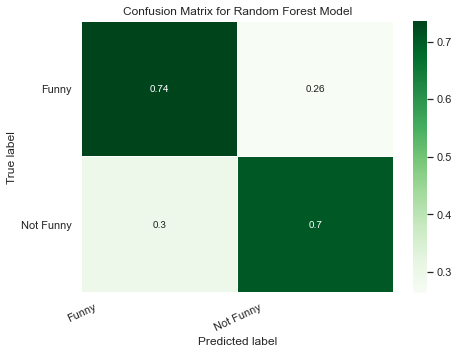

In [85]:
# View confusion matrix for test data and predictions
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Funny', 'Not Funny']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### 4.2.4 Predict on input review text, using Random Forest model (version A)

#### Using the same 4 examples as prepared earlier:

In [128]:
# Example 1:
my_review_1 = ["The place is truly a touristic trap dump! It looks like a restaurant, but it is not!"]
classifier_rf.predict(my_review_1)[0]

'Not Funny'

In [129]:
# Example 2:
my_review_2 = ["I told the owner that mochi and doughnuts were speaking to me the words of wisdom"]
classifier_rf.predict(my_review_2)[0]

'Funny'

In [130]:
# Example 3:
my_review_3 = ["Can't even explain how much I love this place"]        
classifier_rf.predict(my_review_3)[0]

'Not Funny'

In [131]:
# Example 4:
my_review_4 = ["This restaurant is not very good. Giving this 3.5 stars and not coming back."]
classifier_rf.predict(my_review_4)[0]

'Not Funny'

## 4.3. Model 3 - Random Forest Classifier (Version B)

Version B of the Random Forest Classifier default parameters, and tfidf vectorizer parameter ngram_range=(1,1)

### 4.3.1. Classifier Model - Random Forest (version B)

In [91]:
# Instances for pipeline
# Term frequency (TF) - Inverse Document Frequency (IDF)
rfc = RandomForestClassifier()
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [92]:
# Specify the pipeline
pipe_rfc = Pipeline([('vect', vect), ('rfc', rfc)])

In [93]:
# Fit the Random Forest Classifier Version B on the training data
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier())])

### 4.3.2. Evaluate Random Forest Model (version B)

#### Predict

In [94]:
# Random Forest model Version B - predict and aanalyze the results
y_pred_rfc = pipe_rfc.predict(x_test)
yt_pred_rfc = pipe_rfc.predict(X_train)

#### Evaluate performance - Confusion Matrix and Test Accuracy Scores

In [95]:
pipe_rfc.score(x_test, y_test)

0.7238955823293173

In [96]:
f1_score(y_test, pipe_rfc.predict(x_test), average=None)

array([0.72458688, 0.72320081])

In [97]:
# Random Forest Model Version B results - Confusion Matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(f'Confusion Matrix :\n {cm_rfc}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test, y_pred_rfc)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train, yt_pred_rfc)}\n')
print(f'Classification Report :\n {classification_report(y_test, y_pred_rfc)}')

Confusion Matrix :
 [[1447  533]
 [ 567 1437]]

Test Set Accuracy Score :
 0.7238955823293173

Train Set Accuracy Score :
 1.0

Classification Report :
               precision    recall  f1-score   support

       Funny       0.72      0.73      0.72      1980
   Not Funny       0.73      0.72      0.72      2004

    accuracy                           0.72      3984
   macro avg       0.72      0.72      0.72      3984
weighted avg       0.72      0.72      0.72      3984



### 4.3.3. Model 3 - Confusion Matrix Vizualization

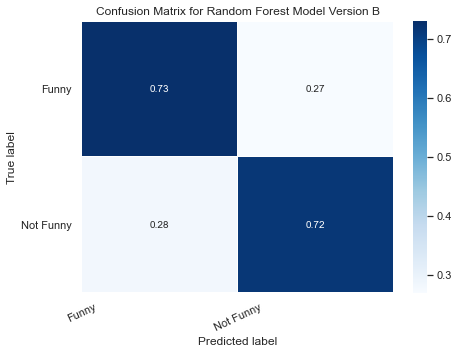

In [98]:
# View confusion matrix for test data and predictions
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_rfc)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Funny', 'Not Funny']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model Version B')
plt.show()

### 4.3.4. Predict on input review text, using Random Forest Model (version B)

#### Using the same 4 examples as prepared earlier:

In [132]:
# Example 1:
my_review_1 = ["The place is truly a touristic trap dump! It looks like a restaurant, but it is not!"]
pipe_rfc.predict(my_review_1)[0]

'Not Funny'

In [133]:
# Example 2:
my_review_2 = ["I told the owner that mochi and doughnuts were speaking to me the words of wisdom"]
pipe_rfc.predict(my_review_2)[0]

'Funny'

In [134]:
# Example 3:
my_review_3 = ["Can't even explain how much I love this place"]
#This restaurant is not very good. Giving this 3.5 stars and not coming back.               
pipe_rfc.predict(my_review_3)[0]

'Not Funny'

In [135]:
# Example 4:
my_review_4 = ["This restaurant is not very good. Giving this 3.5 stars and not coming back."]
pipe_rfc.predict(my_review_4)[0]

'Not Funny'

## 4.4. Model 4 - Linear SGD Classifier

This is a Linear classifier with stochastic gradient descent (SGD) learning

### 4.4.1. Linear Classifier with SGD learning

In [103]:
# Instances for pipeline
sgdc = SGDClassifier()
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

In [116]:
# Define Pipeline
pipe_sgd = Pipeline([('vect', vect), ('clf', sgdc)])

In [105]:
# Fit the SGD model on the training data
pipe_sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('clf', SGDClassifier())])

### 4.4.2. Evaluate Linear SGD Model

#### Predcit

In [106]:
# Linear SGD - predict and analayze the results
y_pred_sgd = pipe_sgd.predict(x_test)
yt_pred_sgd = pipe_sgd.predict(X_train)

#### Evaluate performance - Confusion Matrix and Test Accuracy Scores

In [107]:
pipe_sgd.score(x_test, y_test)

0.7377008032128514

In [108]:
f1_score(y_test, pipe_sgd.predict(x_test), average=None)

array([0.73644388, 0.73894579])

In [109]:
# Linear SGD Model results - Confusion Matrix

cm_sgd = confusion_matrix(y_test, y_pred_sgd)
print(f'Confusion Matrix :\n {cm_sgd}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(y_test, y_pred_sgd)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train, yt_pred_sgd)}\n')
print(f'Classification Report :\n {classification_report(y_test, y_pred_sgd)}')

Confusion Matrix :
 [[1460  520]
 [ 525 1479]]

Test Set Accuracy Score :
 0.7377008032128514

Train Set Accuracy Score :
 0.8638493723849372

Classification Report :
               precision    recall  f1-score   support

       Funny       0.74      0.74      0.74      1980
   Not Funny       0.74      0.74      0.74      2004

    accuracy                           0.74      3984
   macro avg       0.74      0.74      0.74      3984
weighted avg       0.74      0.74      0.74      3984



### 4.4.3. Model 4 - Confusion Matrix Vizualization

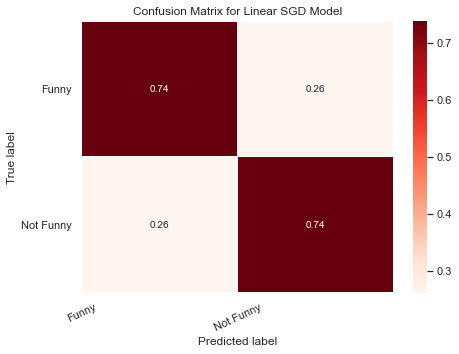

In [110]:
# View confusion matrix for test data and predictions
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_sgd)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

# Add labels to the plot
class_names = ['Funny', 'Not Funny']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Linear SGD Model')
plt.show()

### 4.4.4. Predict on input review text using Linear SGD model:

#### Using the same 4 examples as prepared earlier:

In [118]:
# Example 1:
my_review_1 = ["The place is truly a touristic trap dump! It looks like a restaurant, but it is not!"]
pipe_sgd.predict(my_review_1)[0]

'Funny'

In [119]:
# Example 2:
my_review_2 = ["I told the owner that mochi and doughnuts were speaking to me the words of wisdom"]
pipe_sgd.predict(my_review_2)[0]

'Funny'

In [120]:
# Example 3:
my_review_3 = ["Can't even explain how much I love this place"]
pipe_sgd.predict(my_review_3)[0]

'Not Funny'

In [121]:
# Example 4:
my_review_4 = ["This restaurant is not very good. Giving this 3.5 stars and not coming back."]
pipe_sgd.predict(my_review_4)[0]

'Not Funny'

# 5. Pickle the models

In [115]:
import pickle
pickle.dump(clf_svm, open('Model_01_svm.pkl', 'wb'))
pickle.dump(classifier_rf, open('Model_02_RF_A.pkl', 'wb'))
pickle.dump(pipe_rfc, open('Model_03_RF_B.pkl', 'wb'))
pickle.dump(pipe_sgd, open('Model_04_SGD.pkl', 'wb'))

# 6. Summary and Conclusions

## 6.1. Metrics

Here is how the models have performed:
- Model 1:
        Accuracy Score: 0.7105923694779116
        f1_score: [0.69745474, 0.72263652]

- Model 2:
        Accuracy Score: 0.7213855421686747
        f1_score: [0.72277722, 0.71997982]
        
- Model 3:
        Accuracy Score: 0.7319277108433735
        f1_score: [0.73419612, 0.72962025]
        
- Model 4:
        Accuracy Score: 0.7374497991967871
        f1_score: [0.73411286, 0.74070402]

## 6.2. Summary

Model 1 was a Linear SVM classifier - when fed an review texts, using the Term Frequency Tables as a reference, whem selecting words, which would theoretically influence the prediction of the outcome, the model labeled the following text as 'Funny':
    
    "The place is truly a tourist trap dump! mochi doughnuts do that security ham like baby sound like like Like what jay dim sum offerings words of wisdom"

and this text as 'Not Funny':

    "This restaurant is not very good. Giving this 3.5 stars and not coming back."

Well, you be the judge of how well those two instance have been assessed!

However, to keep the testing consistent - the following four arbitrary Examples have been used, i.e. same for all 4 Models:

- Example 1 Review Text:

        "The place is truly a touristic trap dump! It looks like a restaurant, but it is not!"
        
- Example 2 Review Text:

        "I told the owner that mochi and doughnuts were speaking to me the words of wisdom"
        
- Example 3 Review Text:

        "I told the owner that mochi and doughnuts were speaking to me the words of wisdom"

- Example 4 Review Text:

        "This restaurant is not very good. Giving this 3.5 stars and not coming back."

And this is how the Models labeled them:
- Model 1:

            - Example 1 - Funny
            - Example 2 - Not Funny
            - Example 3 - Not Funny
            - Example 4 - Not Funny
            
- Model 2:

            - Example 1 - Not Funny
            - Example 2 - Not Funny
            - Example 3 - Not Funny
            - Example 4 - Not Funny

- Model 3:

            - Example 1 - Funny
            - Example 2 - Not Funny
            - Example 3 - Not Funny
            - Example 4 - Not Funny

- Model 4:

            - Example 1 - Funny
            - Example 2 - Funny
            - Example 3 - Not Funny
            - Example 4 - Not Funny

## 6.3. Conclusion

As we can see, judging by performance evaluations, we would be better off sticking with Model 4 - after all it seems to have the best sense of humor!!!

Also, let us not forget that the 'funniness' of the texts is always going to be subjective - at least by us, the humans.